Mean Squared Error is :  810035.581545045
r2 score is :  0.9131356578557108
Interpretation of Coefficients
Intercept/n 3573.7479020495757
Intercept: 3573.7479020495757
Advertising Expenditure Coefficient: 2.1964185176072784
Store Location Coefficient: 1783.515120475417
Competition Coefficient: 1990.8238197584549

F-Statistic: 151.29
P-Value (F-test): 0.0000

T-Statistics and P-Values for Coefficients:
                              Coef.    Std.Err.  ...       [0.025       0.975]
const                   3573.747902  711.447991  ...  2084.670144  5062.825660
AdvertisingExpenditure     2.196419    0.172099  ...     1.836212     2.556625
StoreLocation           1783.515120  413.975328  ...   917.054801  2649.975440
Competition             1990.823820  495.329288  ...   954.087705  3027.559935

[4 rows x 6 columns]


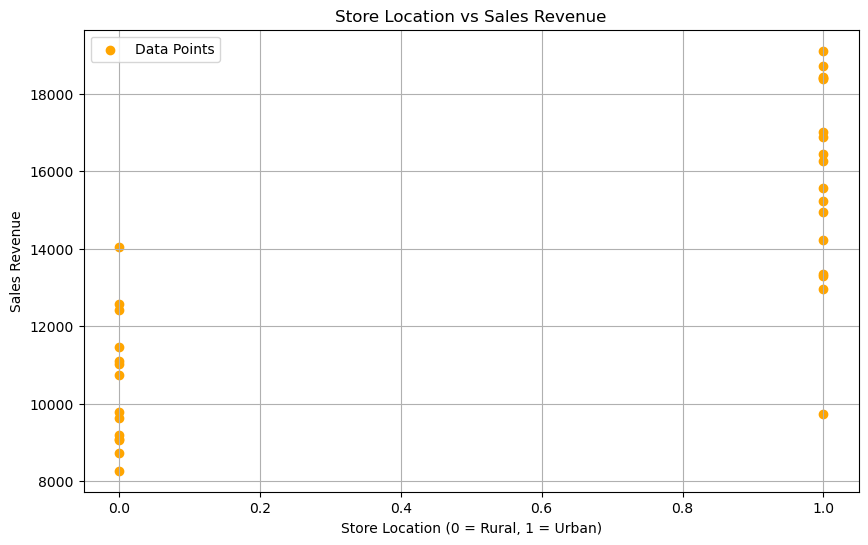

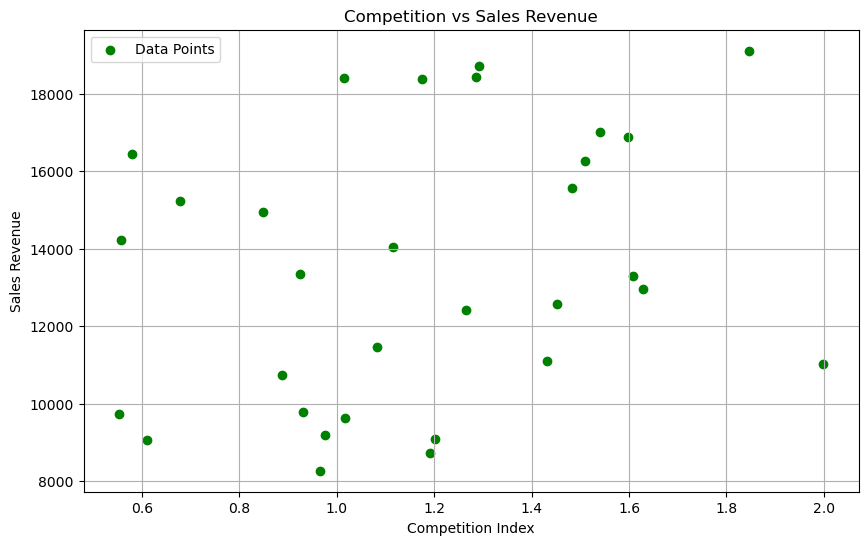

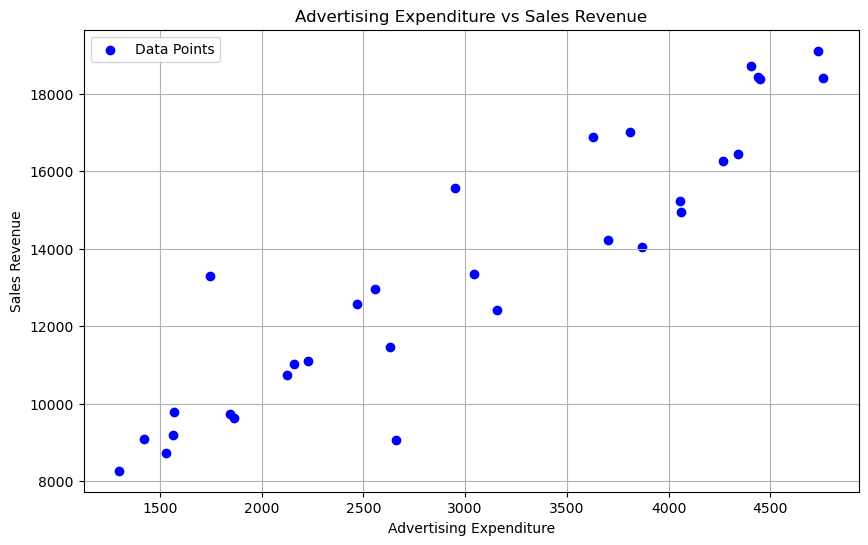

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv("sales (1).csv")
X = df[['AdvertisingExpenditure','StoreLocation','Competition']]
y=df['SalesRevenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=3)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train_sm).fit()
ypred = model.predict(X_test_sm)

mse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print("Mean Squared Error is : ",mse)
print("r2 score is : ",r2)

print("Interpretation of Coefficients")
print("Intercept/n",model.params['const'])
print("Intercept:", model.params['const'])
print("Advertising Expenditure Coefficient:", model.params['AdvertisingExpenditure'])
print("Store Location Coefficient:", model.params['StoreLocation'])
print("Competition Coefficient:", model.params['Competition'])

# t-test
f_statistic = model.fvalue
pvalue_f = model.f_pvalue
print(f"\nF-Statistic: {f_statistic:.2f}")
print(f"P-Value (F-test): {pvalue_f:.4f}")

# Perform t-tests for each coefficient
print("\nT-Statistics and P-Values for Coefficients:")
print(model.summary2().tables[1])

# Graph 1: Store Location vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['StoreLocation'], df['SalesRevenue'], color="orange", label="Data Points")
plt.title("Store Location vs Sales Revenue")
plt.xlabel("Store Location (0 = Rural, 1 = Urban)")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()

# Graph 2: Competition vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['Competition'], df['SalesRevenue'], color="green", label="Data Points")
plt.title("Competition vs Sales Revenue")
plt.xlabel("Competition Index")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()

# Graph 3: Advertising Expenditure vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['AdvertisingExpenditure'], df['SalesRevenue'], color="blue", label="Data Points")
plt.title("Advertising Expenditure vs Sales Revenue")
plt.xlabel("Advertising Expenditure")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()